# Eyes closed masking file

In [1]:
import pandas as pd
import numpy as np
import h5py

dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
hf = h5py.File(f"{dir}/eyesclosedmarked.mat", "r")
print(hf.keys())
# extract data from files group

masking_df = pd.DataFrame(hf["data"][:]).T
# keep only the first and the last 29 rows, since this is where there is eyes open data. And drop the 4th last patient since too little data.
keep = np.concatenate([np.array([0]), np.arange(49, 58), np.arange(59, 65),np.arange(66, 80)])
masking_df = masking_df.iloc[keep, :]
# drop the 4th last patient
masking_df = masking_df.drop(masking_df.index[-4])


print(masking_df.head())
print(masking_df.shape)


# # Convert to a pandas dataframe
# data = np.array(new_data).T
# print(df.head())


<KeysViewHDF5 ['#refs#', '#subsystem#', 'EEG', 'data', 'files', 'ii']>
    0     1     2     3     4     5     6     7     8     9     ...  5593  \
0    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
49   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
50   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
51   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
52   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   

    5594  5595  5596  5597  5598  5599  5600  5601  5602  
0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
49   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
50   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
51   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
52   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5603 columns]
(29, 5603)


# Eyes closed data

In [2]:
import mne
import os

newdata = []
dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
for i in range(10002, 10213 + 1):
    file_name = f"{i}_p01_epoched_60EpochsMarked.set"
    if os.path.isfile(os.path.join(dir, file_name)):
        data = mne.io.read_epochs_eeglab(f"{dir}/{file_name}",verbose=False)
        newdata.append(data.get_data())
print(len(newdata))
print(newdata[0].shape[0])
print(newdata[1].shape)




80
1807
(1352, 19, 200)


In [3]:
#save newdata as a pickle file
import pickle
with open(f"{dir}/closeddata.pkl", "wb") as f:
    pickle.dump(newdata, f)

#load newdata from pickle file



# Create ID list to keep only relevant data

In [4]:
import pickle
with open(f"{dir}/closeddata.pkl", "rb") as f:
    closeddata = pickle.load(f)

keep = np.concatenate([np.array([0]), np.arange(49, 58), np.arange(59, 65), np.arange(66, 80)])
# keep only the lists that are in keep array
closeddata = [data for i, data in enumerate(closeddata) if i in keep]
#delete 4th last list
del closeddata[-4]
print(len(closeddata[0]))


1807


In [5]:
import numpy as np

#create a list of patient ids from one to 29 with each occuring as many timesa as closeddata[i].shape[0]

patient_ids = np.arange(0, 29)
patient_ids = np.repeat(patient_ids, [data.shape[0] for data in closeddata])
print(patient_ids)
#couint each entryie of each patient id
from collections import Counter
print(Counter(patient_ids))


[ 0  0  0 ... 28 28 28]
Counter({np.int64(20): 4234, np.int64(9): 3618, np.int64(12): 3371, np.int64(2): 3123, np.int64(11): 3043, np.int64(5): 2736, np.int64(18): 2599, np.int64(17): 2592, np.int64(6): 2541, np.int64(10): 2257, np.int64(23): 2212, np.int64(7): 2051, np.int64(15): 1994, np.int64(8): 1911, np.int64(28): 1911, np.int64(1): 1901, np.int64(22): 1879, np.int64(14): 1864, np.int64(3): 1859, np.int64(4): 1847, np.int64(19): 1819, np.int64(13): 1816, np.int64(25): 1815, np.int64(27): 1810, np.int64(26): 1809, np.int64(0): 1807, np.int64(16): 1683, np.int64(21): 1372, np.int64(24): 816})


# Trim masking lists to match number of eyes closed epochs

In [6]:
import matplotlib.pyplot as plt


# convert df to a list of lists

print(f"masking_df.shape: {masking_df.shape}")

masking_lists = []
for i in range(masking_df.shape[0]):
    masking_lists.append(masking_df.iloc[i].values)
print(len(masking_lists))
print(masking_lists[1].shape)

from collections import Counter
# Count occurrences of each number in list 'a'
count_a = Counter(patient_ids)


# Create a new list of lists where each sublist is trimmed to the count of its corresponding number
closed_trimmed_masking_lists = []
for num in range(29):  # Assuming numbers are from 0 to 28
    occurrences = count_a[num]
    trimmed_list = masking_lists[num][:occurrences]
    closed_trimmed_masking_lists.append(trimmed_list)


# Print amount of zeros in each list
for i, lst in enumerate(closed_trimmed_masking_lists):
    print(f"number of 0 entries in trimmed_list: {np.sum(lst == 0)}")
# looks good, 60 in each.


# save 


masking_df.shape: (29, 5603)
29
(5603,)
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60
number of 0 entries in trimmed_list: 60


In [7]:
print(f"length of trimmed_lists: {len(closed_trimmed_masking_lists[0])}")
print(closed_trimmed_masking_lists[0])
print(f"index where 0 occurs: {np.where(closed_trimmed_masking_lists[0] == 0)}")
# Epochs are NOT 60 continuous epochs, but 60 epochs in total. There can be multiple segments of epochs.

length of trimmed_lists: 1807
[1. 1. 1. ... 1. 1. 1.]
index where 0 occurs: (array([ 94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 115, 116, 117, 118, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 432, 433, 434, 435, 436, 437, 438]),)


60
(19, 200)
(19, 200)
(200,)


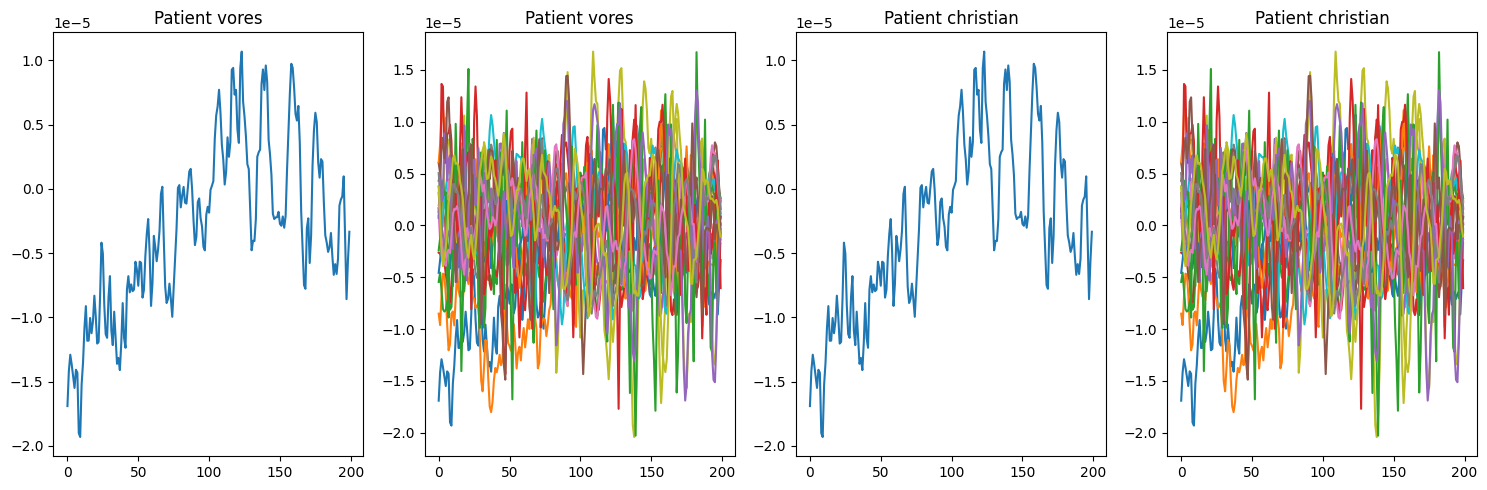

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(15, 5))


#load  df_EOandEC.pkl
import pickle
# with open(f"{dir}/df_EOandEC.pkl", "rb") as f:
#     df = pickle.load(f)

with open(f"{dir}/trimmed_closed_data.pkl", "rb") as f:
    df = pickle.load(f)
    
print(len(df[0]))
print(df[0][0, :].shape)
print(df[0][0, :200].shape)
print(df[0][0, :][0, :].shape)

test_patient = 19

# Plot 1
pat1_single = df[test_patient][0, :][0, :]
ax[0].plot(pat1_single)
ax[0].set_title("Patient vores")

# Plot 2
pat1_full = df[test_patient][0, :].T
ax[1].plot(pat1_full)
ax[1].set_title("Patient vores")

# Plot 3
labels = closed_trimmed_masking_lists[test_patient]
hospital_pat1 = closeddata[test_patient][labels == 0]
ax[2].plot(hospital_pat1[0, 0, :])
ax[2].set_title("Patient christian")

# Plot 4
ax[3].plot(hospital_pat1[0, :, :].T)
ax[3].set_title("Patient christian")

# Plot 5


plt.tight_layout()
plt.show()

In [ ]:

print(f"shape of closeddata: {closeddata[0].shape}")

# For each row in closeddata, keep only the epochs where the label is 0 in trimmed_lists
trimmed_closed_data = []
for i, data in enumerate(closeddata):
    print(f"shape of data: {data.shape}")
    labels = closed_trimmed_masking_lists[i]
    trimmed_data = data[labels == 0]
    trimmed_closed_data.append(trimmed_data)
    print(f"shape of trimmed_data: {trimmed_data.shape}")


plt.plot(trimmed_closed_data[1][0, :][0, :])
plt.show()
plt.plot(trimmed_closed_data[1][0, :].T)
plt.show()


# Print the result
# for i, data in enumerate(trimmed_closed_data):
#     # print(f"Data for {i}: {data[:5]}")
#     # print(len(data))



#save trimmed_closed_data as a pickle file
with open(f"{dir}/trimmed_closed_data.pkl", "wb") as f:
    pickle.dump(trimmed_closed_data, f)





# Eyes open data

In [10]:
import pickle
# dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
# with open(f"{dir}/opendata.pkl", "rb") as f:
#     opendata = pickle.load(f)
    


opendata = []
dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
for i in range(10002, 10213 + 1):
    file_name = f"{i}_p01_epoched_EyesOpen_marked.set"
    if os.path.isfile(os.path.join(dir, file_name)):
        data = mne.io.read_epochs_eeglab(f"{dir}/{file_name}",verbose=False)
        opendata.append(data.get_data())
print(len(opendata))
print(opendata[0].shape[0])
print(opendata[1].shape)

# drop 4th last patient
del opendata[-4]


30
1807
(1901, 19, 200)


In [11]:
#check length of opendata and closeddata
print(len(opendata))
print(len(closeddata))
#check len of each patient in opendata and closeddata and see if they are the same
print([data.shape[0] for data in opendata])
print([data.shape[0] for data in closeddata])
#make a new sorted version of closeddata and opendata
newcloseddata = closeddata.copy()
newopendata = opendata.copy()
#sort the patients data in closeddata and opendata
newcloseddata.sort(key=lambda x: x.shape[0])
newopendata.sort(key=lambda x: x.shape[0])
print(f" open   : {[data.shape[0] for data in newopendata]}")
print(f" closed : {[data.shape[0] for data in newcloseddata]}")
#check if the data 



29
29
[1807, 1901, 3123, 1859, 1847, 2736, 2541, 2051, 1911, 3618, 2257, 3043, 3371, 1816, 1864, 1994, 1683, 2592, 2599, 1819, 4234, 1372, 1879, 2212, 816, 1815, 1809, 1810, 1911]
[1807, 1901, 3123, 1859, 1847, 2736, 2541, 2051, 1911, 3618, 2257, 3043, 3371, 1816, 1864, 1994, 1683, 2592, 2599, 1819, 4234, 1372, 1879, 2212, 816, 1815, 1809, 1810, 1911]
 open   : [816, 1372, 1683, 1807, 1809, 1810, 1815, 1816, 1819, 1847, 1859, 1864, 1879, 1901, 1911, 1911, 1994, 2051, 2212, 2257, 2541, 2592, 2599, 2736, 3043, 3123, 3371, 3618, 4234]
 closed : [816, 1372, 1683, 1807, 1809, 1810, 1815, 1816, 1819, 1847, 1859, 1864, 1879, 1901, 1911, 1911, 1994, 2051, 2212, 2257, 2541, 2592, 2599, 2736, 3043, 3123, 3371, 3618, 4234]


# Load in masking file, trim it down to correct size and apply it to data file

In [12]:
import pandas as pd
import numpy as np
import h5py

hf = h5py.File(f"{dir}/eyesopenmarked.mat", "r")
print(hf.keys())
print(hf["files"])
# extract data from files group

dfopen = pd.DataFrame(hf["data"][:]).T
dfopen = dfopen[:30]
dfopen = dfopen.drop(dfopen.index[-4])
print(dfopen.shape)

# convert df to a list of numpy arrays
labeldata = []
for i in range(dfopen.shape[0]):
    labeldata.append(dfopen.iloc[i].values)
print(len(labeldata))
print(labeldata[1].shape)




# Create a new list of lists where each sublist is trimmed to the count of its corresponding number
open_trimmed_masking_lists = []
for num in range(29):  # Assuming numbers are from 0 to 28
    occurrences = count_a[num]
    trimmed_list = labeldata[num][:occurrences]
    open_trimmed_masking_lists.append(trimmed_list)

#check length of opendata and closeddata
print(len(open_trimmed_masking_lists))
print(len(closed_trimmed_masking_lists))
#check len of each patient in opendata and closeddata and see if they are the same
print([data.shape[0] for data in open_trimmed_masking_lists])
print([data.shape[0] for data in closed_trimmed_masking_lists])
#make a new sorted version of closeddata and opendata
newcloseddata = closed_trimmed_masking_lists.copy()
newopendata = open_trimmed_masking_lists.copy()
#sort the patients data in closeddata and opendata
newcloseddata.sort(key=lambda x: x.shape[0])
newopendata.sort(key=lambda x: x.shape[0])
print(f" open   : {[data.shape[0] for data in newopendata]}")
print(f" closed : {[data.shape[0] for data in newcloseddata]}")




<KeysViewHDF5 ['#refs#', '#subsystem#', 'EEG', 'data', 'files', 'ii']>
<HDF5 group "/files" (6 members)>
(29, 4234)
29
(4234,)
29
29
[1807, 1901, 3123, 1859, 1847, 2736, 2541, 2051, 1911, 3618, 2257, 3043, 3371, 1816, 1864, 1994, 1683, 2592, 2599, 1819, 4234, 1372, 1879, 2212, 816, 1815, 1809, 1810, 1911]
[1807, 1901, 3123, 1859, 1847, 2736, 2541, 2051, 1911, 3618, 2257, 3043, 3371, 1816, 1864, 1994, 1683, 2592, 2599, 1819, 4234, 1372, 1879, 2212, 816, 1815, 1809, 1810, 1911]
 open   : [816, 1372, 1683, 1807, 1809, 1810, 1815, 1816, 1819, 1847, 1859, 1864, 1879, 1901, 1911, 1911, 1994, 2051, 2212, 2257, 2541, 2592, 2599, 2736, 3043, 3123, 3371, 3618, 4234]
 closed : [816, 1372, 1683, 1807, 1809, 1810, 1815, 1816, 1819, 1847, 1859, 1864, 1879, 1901, 1911, 1911, 1994, 2051, 2212, 2257, 2541, 2592, 2599, 2736, 3043, 3123, 3371, 3618, 4234]


In [ ]:

# For each row in opendata, keep only the epochs where the label is 0 in trimmed_lists
trimmed_open_data = []
zeros_in_labls = []
for i, data in enumerate(opendata):
    print(f"shape of data: {data.shape}")
    labels = open_trimmed_masking_lists[i]
    trimmed_data = data[labels == 0]
    print(f" number of zeros in labels: {np.sum(labels == 0)}")
    zeros_in_labls.append(np.sum(labels == 0))
    trimmed_open_data.append(trimmed_data)
    print(f"shape of trimmed_data: {trimmed_data.shape}")



# create open_patients_ids from trimmed lists
open_patient_ids = np.arange(0, 29)
open_patient_ids = np.repeat(open_patient_ids, [data.shape[0] for data in trimmed_open_data])
print(open_patient_ids)
print(f" number of unique patient ids: {len(np.unique(open_patient_ids))}")


# save trimmed_open_data as a pickle file
with open(f"{dir}/trimmed_open_data.pkl", "wb") as f:
    pickle.dump(trimmed_open_data, f)



# Create one big dataframe 

In [14]:
import numpy as np
print(np.__version__)


2.1.3


first shape of trimmed_open_data: (60, 19, 200)


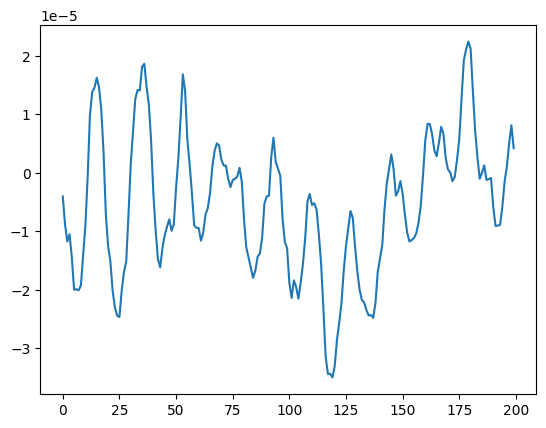

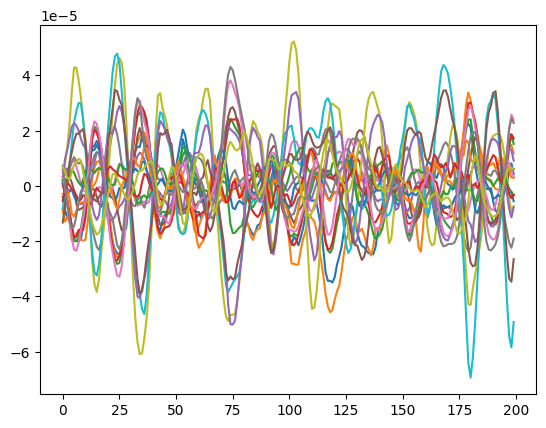

          0         1         2         3         4         5             6  \
0 -0.000004 -0.000009 -0.000012 -0.000010 -0.000014 -0.000020 -1.990352e-05   
1 -0.000005 -0.000012 -0.000015 -0.000020 -0.000026 -0.000026 -2.479350e-05   
2  0.000022  0.000018  0.000013  0.000008  0.000003  0.000001  9.871100e-07   
3  0.000007  0.000003 -0.000001 -0.000004 -0.000007 -0.000008 -6.191659e-06   
4  0.000013  0.000013  0.000012  0.000012  0.000010  0.000010  1.009186e-05   

              7         8             9  ...          3791      3792  \
0 -2.007265e-05 -0.000019 -1.404443e-05  ... -1.092016e-05 -0.000010   
1 -2.346011e-05 -0.000018 -1.718349e-05  ...  1.259601e-06  0.000002   
2 -2.112761e-07 -0.000002 -1.798665e-06  ... -6.569762e-06 -0.000005   
3 -4.011699e-06 -0.000002  4.808684e-07  ... -3.040970e-06 -0.000005   
4  8.046945e-06  0.000007  4.599984e-06  ... -8.812295e-07  0.000002   

           3793      3794      3795      3796      3797          3798  \
0 -6.451550e-06 -0.

In [15]:
# load in trimmed_open_data.pkl and trimmed_closed_data.pkl and convert both to dataframes and stack them vertically
import pickle
import pandas as pd
import matplotlib.pyplot as plt
dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
with open(f"{dir}/trimmed_open_data.pkl", "rb") as f:
    trimmed_open_data = pickle.load(f)

with open(f"{dir}/trimmed_closed_data.pkl", "rb") as f:
    trimmed_closed_data = pickle.load(f)

# print(f"shapes of the two dataframes: {len(trimmed_open_data)}, {len(trimmed_closed_data)}")

print(f"first shape of trimmed_open_data: {trimmed_closed_data[0].shape}")
plt.plot(trimmed_closed_data[0][0, 0, :])
plt.show()
plt.plot(trimmed_closed_data[0][0, :, :].T)
plt.show()

# convert trimmed_closed_data to a dataframe
closed_df = pd.DataFrame()
for i, data in enumerate(trimmed_closed_data):
    data = data.reshape(data.shape[0], -1)
    df = pd.DataFrame(data)
    closed_df = pd.concat([closed_df, df], axis=0)
closed_df["label"] = 1

open_df = pd.DataFrame()
for i, data in enumerate(trimmed_open_data):
    data = data.reshape(data.shape[0], -1)
    df = pd.DataFrame(data)
    open_df = pd.concat([open_df, df], axis=0)
open_df["label"] = 0

# plt.plot(closed_df.iloc[0, :200])
# plt.show()
# plt.plot(closed_df.iloc[0, :-1].values.reshape(19,200).T)
# plt.show()

# stack the two dataframes vertically
df = pd.concat([closed_df, open_df], axis=0)
print(df.head(), df.shape)

# save df as a pickle file
with open(f"{dir}/df_EOandEC.pkl", "wb") as f:
    pickle.dump(df, f)

# Create Patient ID's

In [16]:
closed_patient_ids = np.repeat(np.arange(0, 29), 60)
open_patient_ids = np.repeat(np.arange(0, 29), [data.shape[0] for data in trimmed_open_data])

print(len(closed_patient_ids), len(open_patient_ids))
patient_ids = np.concatenate([closed_patient_ids, open_patient_ids])

# attach patient ids to df
df["patient_id"] = patient_ids
print(df.shape)

print(df.head())




1740 1475
(3215, 3802)
          0         1         2         3         4         5             6  \
0 -0.000004 -0.000009 -0.000012 -0.000010 -0.000014 -0.000020 -1.990352e-05   
1 -0.000005 -0.000012 -0.000015 -0.000020 -0.000026 -0.000026 -2.479350e-05   
2  0.000022  0.000018  0.000013  0.000008  0.000003  0.000001  9.871100e-07   
3  0.000007  0.000003 -0.000001 -0.000004 -0.000007 -0.000008 -6.191659e-06   
4  0.000013  0.000013  0.000012  0.000012  0.000010  0.000010  1.009186e-05   

              7         8             9  ...      3792          3793  \
0 -2.007265e-05 -0.000019 -1.404443e-05  ... -0.000010 -6.451550e-06   
1 -2.346011e-05 -0.000018 -1.718349e-05  ...  0.000002  8.180189e-07   
2 -2.112761e-07 -0.000002 -1.798665e-06  ... -0.000005 -1.266182e-07   
3 -4.011699e-06 -0.000002  4.808684e-07  ... -0.000005 -4.692287e-06   
4  8.046945e-06  0.000007  4.599984e-06  ...  0.000002  2.542886e-06   

       3794      3795      3796      3797          3798      3799  la

In [17]:
# Upsample data from 200 -> 256 Hz
import numpy as np
import pandas as pd
import pickle

dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
with open(f"{dir}/df_EOandEC.pkl", "rb") as f:
    df = pickle.load(f)

print(df.head())

# convert df to a list of numpy arrays
data = []
for i in range(df.shape[0]):
    data.append(df.iloc[i, :-1].values.reshape(19, 200))
data = np.array(data)
print(data.shape)

# upsample data
from scipy.signal import resample
upsampled_data = []
for i in range(data.shape[0]):
    upsampled_data.append(resample(data[i], 256, axis=1))
upsampled_data = np.array(upsampled_data)
print(upsampled_data.shape)


          0         1         2         3         4         5             6  \
0 -0.000004 -0.000009 -0.000012 -0.000010 -0.000014 -0.000020 -1.990352e-05   
1 -0.000005 -0.000012 -0.000015 -0.000020 -0.000026 -0.000026 -2.479350e-05   
2  0.000022  0.000018  0.000013  0.000008  0.000003  0.000001  9.871100e-07   
3  0.000007  0.000003 -0.000001 -0.000004 -0.000007 -0.000008 -6.191659e-06   
4  0.000013  0.000013  0.000012  0.000012  0.000010  0.000010  1.009186e-05   

              7         8             9  ...          3791      3792  \
0 -2.007265e-05 -0.000019 -1.404443e-05  ... -1.092016e-05 -0.000010   
1 -2.346011e-05 -0.000018 -1.718349e-05  ...  1.259601e-06  0.000002   
2 -2.112761e-07 -0.000002 -1.798665e-06  ... -6.569762e-06 -0.000005   
3 -4.011699e-06 -0.000002  4.808684e-07  ... -3.040970e-06 -0.000005   
4  8.046945e-06  0.000007  4.599984e-06  ... -8.812295e-07  0.000002   

           3793      3794      3795      3796      3797          3798  \
0 -6.451550e-06 -0.

# Check data vs original

hospital_pat1.shape: (43, 19, 200)
len of trimmed_lists: 1807
len of closeddata: 1807


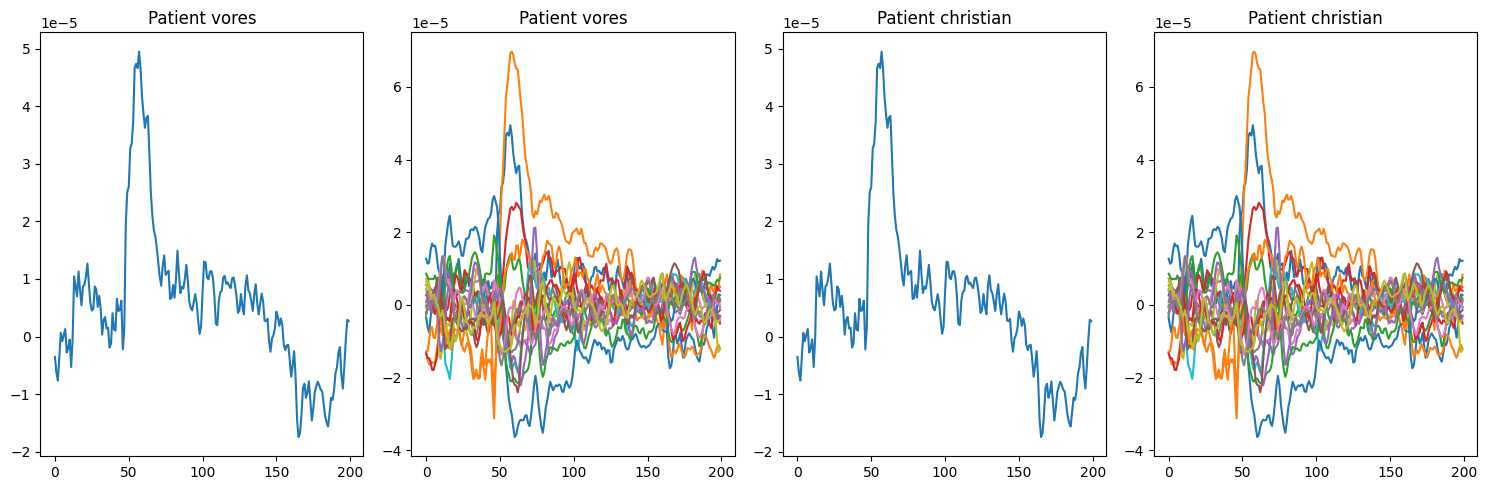

In [18]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

#Plot 1
pat1_single = open_df.iloc[0,:-1].values.reshape(19,200)[0,:]
ax[0].plot(pat1_single)
ax[0].set_title("Patient vores")


# Plot 2
pat1_full = open_df.iloc[0, :-1].values.reshape(19, 200).T
ax[1].plot(pat1_full)
ax[1].set_title("Patient vores")

# Plot 3
labels = open_trimmed_masking_lists[0]
hospital_pat1 = opendata[0][labels == 0]
print(f"hospital_pat1.shape: {hospital_pat1.shape}")
print(f"len of trimmed_lists: {len(closed_trimmed_masking_lists[0])}")
print(f"len of closeddata: {len(closeddata[0])}")
ax[2].plot(hospital_pat1[0, 0, :])
ax[2].set_title("Patient christian")

# Plot 4
ax[3].plot(hospital_pat1[0, :, :].T)
ax[3].set_title("Patient christian")

plt.tight_layout()
plt.show()




# Scale data patientwise(global patient parameters)

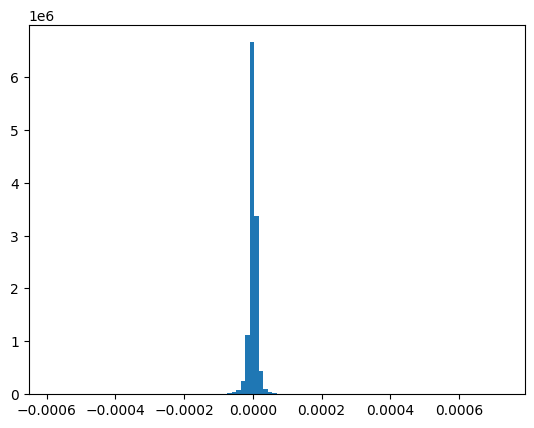

before scaling:           0         1         2        3         4         5         6  \
0 -0.000004 -0.000009 -0.000012 -0.00001 -0.000014 -0.000020 -0.000020   
1 -0.000005 -0.000012 -0.000015 -0.00002 -0.000026 -0.000026 -0.000025   

          7         8         9  ...      3791      3792          3793  \
0 -0.000020 -0.000019 -0.000014  ... -0.000011 -0.000010 -6.451550e-06   
1 -0.000023 -0.000018 -0.000017  ...  0.000001  0.000002  8.180189e-07   

       3794      3795      3796      3797      3798      3799  label  
0 -0.000002  0.000002  0.000005  0.000007  0.000007  0.000006      1  
1 -0.000004 -0.000009 -0.000012 -0.000012 -0.000010 -0.000007      1  

[2 rows x 3801 columns]
min and max: (np.float64(-0.0005872615356445312), np.float64(0.0007250277099609374))


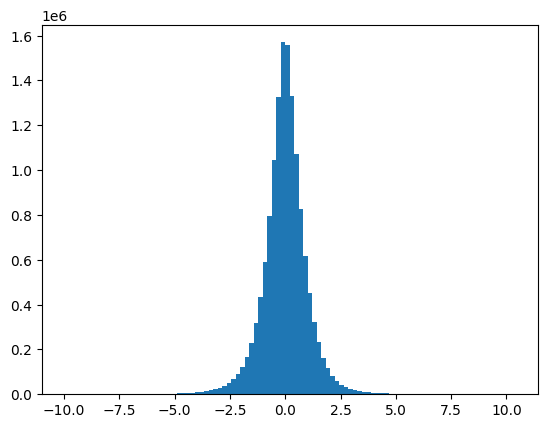

In [19]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

plt.hist(df.iloc[:, :-2].values.flatten(), bins=100)
plt.show()

# y = df["label"].values
# patient_ids = df["patient_id"].values


# Normalize per patient (within training and test sets)>
print(f"before scaling: {df.head(2)}")
print(f"min and max: {np.min(df), np.max(df.iloc[:, :-2])}")
df_norm = []
for patient_id in np.unique(patient_ids):
    patient_data = upsampled_data[patient_ids == patient_id]
    scaler = StandardScaler()
    #flatten the data
    patient_data = patient_data.reshape(patient_data.shape[0], -1)
    # scaler = MinMaxScaler(feature_range=(-1,1))
    patient_data_scaled = scaler.fit_transform(patient_data)
    #reshape back to original shape
    patient_data_scaled = patient_data_scaled.reshape(patient_data_scaled.shape[0], 19, 256)
    df_norm.append(patient_data_scaled)

df_norm = np.concatenate(df_norm, axis=0)
# Add labels back
# y = np.repeat([1,0], [29*60,3215-29*60])
# df_norm = np.concatenate([df_norm, y], axis=1)
# # Add patient ids back
# df_norm = np.concatenate([df_norm, patient_ids.reshape(-1, 1)], axis=1)
# print(f"after scaling: {df_norm[:5,:]}")
# print(f"min and max: {np.min(df_norm)}, {np.max(df_norm[:, :-2])}")


plt.hist(df_norm[:, :-2].flatten(), bins=100)
plt.show()

# save df_norm as a pickle file
with open(f"{dir}/df_EOandEC_norm_hospital.pkl", "wb") as f:
    pickle.dump(df_norm, f)

# save in a numpy format
np.save(f"{dir}/df_EOandEC_norm_hospital.npy", df_norm)




In [20]:


import numpy as np
print(np.__version__)

2.1.3


# Fourier Transform

In [ ]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# load in df_EOandEC_norm.csv
import pandas as pd
import pickle

dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
# open EOandEC_norm.pkl
with open(f"{dir}/df_EOandEC_norm_hospital.pkl", "rb") as f:
    df_norm = pickle.load(f)
# df = pd.read_csv(f"{dir}/df_EOandEC_norm.csv")
# print(df.head())
print(df_norm.shape)

plt.hist(df_norm[:, :-2].flatten(), bins=100)
plt.show()

# reshaped_data = df_norm[:, :-2]
# Reshape the data to have the shape (n_epochs, n_channels, n_samples)
reshaped_data = np.hstack(df_norm).reshape(-1, 19, 256)

fs = 256  # Sampling frequency (in Hz)
nperseg = fs/2  # Length of each segment for STFT (typically a power of 2)

# create empty list for the spectrograms, each channel will have its own list
spectrograms = [[] for _ in range(df_norm.shape[0])]
print(f"shape of spectrograms: {len(spectrograms)}")

for i, epoch in enumerate(reshaped_data): # loop over each channel
    print(f"epoch shape: {epoch.shape}")
    # Compute the Short-Time Fourier Transform (STFT) for each channel
    temp_spectrograms = []
    for chan in epoch:
        f, t, Zxx = stft(chan, fs=fs, nperseg=nperseg)
        # Compute the magnitude of the STFT
        spectrogram = np.abs(Zxx)
        print(f"shape of spectrogram: {spectrogram.shape}")

        # Flatten the spectrogram of this channel
        spectrogram_flattened = spectrogram.flatten()  # Flatten to 1D array
        print(f"shape of spectrogram_flattened: {spectrogram_flattened.shape}")
    
        # Append to list
        temp_spectrograms.append(spectrogram_flattened)

    # Append the list of spectrograms for this epoch to the main list
    spectrograms[i] = temp_spectrograms


print(len(spectrograms[0]))

# save spectrograms as a pickle file
spectrograms = np.array(spectrograms).reshape(-1, 19*325)
df = pd.DataFrame(spectrograms)
y = np.repeat([1,0], [29*60,3215-29*60])
df["label"] = y
df["patient_id"] = patient_ids
print(df.head())


plt.hist(spectrograms.flatten(), bins=100)
plt.show()

with open(f"{dir}/hospital_spectrograms.pkl", "wb") as f:
    pickle.dump(spectrograms, f)

# save as a csv file
df.to_csv(f"{dir}/hospital_spectrograms.csv", index=False)



# Log Reg Loop

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneGroupOut

# load hospital_spectrograms.csv
import pandas as pd
import numpy as np

dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
df = pd.read_csv(f"{dir}/hospital_spectrograms.csv")
df_norm = df.values
print(f"min and max and mean and std of df_norm: {np.min(df_norm), np.max(df_norm[:,:-2]), np.mean(df_norm), np.std(df_norm)}")


accs = []

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

patient_ids = df_norm[:, -1]
y = df_norm[:, -2]
data = df_norm[:, :-2]

preds = []

# Train-test split using Leave-One-Group-Out
for i, (train_index, test_index) in enumerate(logo.split(data, y, groups=patient_ids)):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the logistic regression model
    model = LogisticRegression(max_iter=1000, verbose=1,class_weight="balanced")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    preds.append(y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accs.append(accuracy)
    print(f'Model accuracy for Patient {i}: {accuracy*100:.2f}%')

# Print the average accuracy over all patients
print(f'Average accuracy across patients: {np.mean(accs)*100:.2f}%')



In [2]:

# save preds as npy file
preds = np.array(np.concatenate(preds))
np.save(f"{dir}/hospital_preds.npy", preds)


sum of cm: 3215


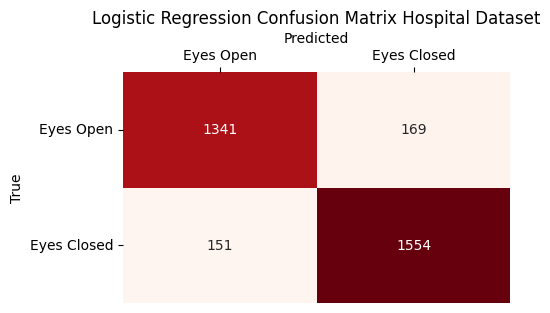

In [31]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = [[1341,  169],
 [  151, 3215-(1341+169+151)]]

print(f"sum of cm: {np.sum(cm)}")

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Eyes Open', 'Eyes Closed'], yticklabels=['Eyes Open', 'Eyes Closed'], cbar=False)
plt.title('Logistic Regression Confusion Matrix Hospital Dataset')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.show()

# Test turkish KNN on hospital data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneGroupOut

# load hospital_spectrograms.csv
import pandas as pd
import numpy as np

dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
df = pd.read_csv(f"{dir}/hospital_spectrograms.csv")
# print(df.head())

dir = "E:/ChristianMusaeus/Data/Turkish"
# load model knn_Standard_Turkish_model.pkl
import pickle
with open(f"{dir}/knn_Standard_Turkish_model.pkl", "rb") as f:
    model = pickle.load(f)

# Evaluate the model on the hospital data patientwise
X = df.values[:, :-2]
y = df.values[:, -2]
patient_ids = df.values[:, -1]

# Make predictions patientwise
y_pred = []
for i in np.unique(patient_ids):
    X_patient = X[patient_ids == i]
    y_patient = y[patient_ids == i]
    y_pred_patient = model.predict(X_patient)
    y_pred.append(y_pred_patient)

y_pred = np.concatenate(y_pred)
# Calculate accuracy patientwise
accs = []
for i in np.unique(patient_ids):
    y_true = y[patient_ids == i]
    y_pred_patient = y_pred[patient_ids == i]
    acc = accuracy_score(y_true, y_pred_patient)
    accs.append(acc)
    print(f'Accuracy for patient {i}: {acc*100:.2f}%')

# Calculate average accuracy
print(f'Average accuracy: {np.mean(accs)*100:.2f}%')




Accuracy for patient 0.0: 41.75%
Accuracy for patient 1.0: 65.91%
Accuracy for patient 2.0: 24.05%
Accuracy for patient 3.0: 62.50%
Accuracy for patient 4.0: 21.05%
Accuracy for patient 5.0: 17.81%
Accuracy for patient 6.0: 42.31%
Accuracy for patient 7.0: 58.90%
Accuracy for patient 8.0: 41.18%
Accuracy for patient 9.0: 22.08%
Accuracy for patient 10.0: 44.44%
Accuracy for patient 11.0: 34.07%
Accuracy for patient 12.0: 26.83%
Accuracy for patient 13.0: 41.75%
Accuracy for patient 14.0: 45.45%
Accuracy for patient 15.0: 21.05%
Accuracy for patient 16.0: 27.71%
Accuracy for patient 17.0: 59.18%
Accuracy for patient 18.0: 52.38%
Accuracy for patient 19.0: 61.54%
Accuracy for patient 20.0: 42.86%
Accuracy for patient 21.0: 36.17%
Accuracy for patient 22.0: 45.45%
Accuracy for patient 23.0: 29.41%
Accuracy for patient 24.0: 55.56%
Accuracy for patient 25.0: 51.22%
Accuracy for patient 26.0: 54.55%
Accuracy for patient 27.0: 64.07%
Accuracy for patient 28.0: 30.23%
Average accuracy: 42.12%

# Test turkish LogReg on hospital data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneGroupOut

# load hospital_spectrograms.csv
import pandas as pd
import numpy as np

dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
df = pd.read_csv(f"{dir}/hospital_spectrograms.csv")
# print(df.head())

dir = "E:/ChristianMusaeus/Data/Turkish"
# load model knn_Standard_Turkish_model.pkl
import pickle
with open(f"{dir}/logreg_standard_model.pkl", "rb") as f:
    model = pickle.load(f)

# Evaluate the model on the hospital data patientwise
X = df.values[:, :-3]
y = df.values[:, -2]
patient_ids = df.values[:, -1]

# Make predictions patientwise
y_pred = []
for i in np.unique(patient_ids):
    X_patient = X[patient_ids == i]
    y_patient = y[patient_ids == i]
    y_pred_patient = model.predict(X_patient)
    y_pred.append(y_pred_patient)

y_pred = np.concatenate(y_pred)
# Calculate accuracy patientwise
accs = []
for i in np.unique(patient_ids):
    y_true = y[patient_ids == i]
    y_pred_patient = y_pred[patient_ids == i]
    acc = accuracy_score(y_true, y_pred_patient)
    accs.append(acc)
    print(f'Accuracy for patient {i}: {acc*100:.2f}%')

# Calculate average accuracy
print(f'Average accuracy: {np.mean(accs)*100:.2f}%')




Accuracy for patient 0.0: 41.75%
Accuracy for patient 1.0: 65.91%
Accuracy for patient 2.0: 24.05%
Accuracy for patient 3.0: 62.50%
Accuracy for patient 4.0: 21.05%
Accuracy for patient 5.0: 17.81%
Accuracy for patient 6.0: 42.31%
Accuracy for patient 7.0: 58.90%
Accuracy for patient 8.0: 41.18%
Accuracy for patient 9.0: 22.08%
Accuracy for patient 10.0: 44.44%
Accuracy for patient 11.0: 34.07%
Accuracy for patient 12.0: 26.83%
Accuracy for patient 13.0: 41.75%
Accuracy for patient 14.0: 45.45%
Accuracy for patient 15.0: 21.05%
Accuracy for patient 16.0: 27.71%
Accuracy for patient 17.0: 59.18%
Accuracy for patient 18.0: 52.38%
Accuracy for patient 19.0: 61.54%
Accuracy for patient 20.0: 42.86%
Accuracy for patient 21.0: 36.17%
Accuracy for patient 22.0: 45.45%
Accuracy for patient 23.0: 29.41%
Accuracy for patient 24.0: 55.56%
Accuracy for patient 25.0: 51.22%
Accuracy for patient 26.0: 54.55%
Accuracy for patient 27.0: 64.07%
Accuracy for patient 28.0: 30.23%
Average accuracy: 42.12%

In [ ]:
print(f"fraction of 0s: {(3215 - np.sum(y)) / len(y)}")
print(f"fraction of 1s: {np.sum(y_pred) / len(y)}")

fraction of 0s: 0.45878693623639194
fraction of 1s: 0.0
